# Analyzing ETCBC data with R

by Martijn Naaijer (m.naaijer@vu.nl)

In this R course you learn how to analyze and visualize structured datasets obtained from the ETCBC database. The focus is on descriptive statistics.

The course consists of three parts:

 1. Basic operations
 2. Moving data around
 3. Analysis and visualization of data

## 1. Basic operations

In this section you will learn how to make a vector and a matrix in R and how to do some basic calculations.

At the end of section 1 you know the following functions:
* c()
* class()
* sum()
* mean()
* cumsum()
* cumprod()
* seq()
* rep()
* length()
* sort()
* matrix()
* colSums()
* rowSums()
* apply()

### 1.1 Basic Operations

First look at some basic arithmetic operations. As in Python, comments are preceded by #.

In [ ]:
5 + 5 # a comment 

5 - 2

5 * 7

5 / 4

5 ^ 5  # power

5 ** 5  # also power

sqrt(5)

1 + 5 ; 1 + 6 # two statements on one line. It is better not to do this, it can easily make lines too long

In [ ]:
1 == 2  # is equal to, result is a Boolean

2 == 2 

1 != 2 # is not equal to 

In [ ]:
3 > 1

3 < 1

The assignment of a value to a variable works as follows 

In [ ]:
num <- 7  # use <- or =

In [ ]:
num

### 1.2 Vectors in R

In R, there is a special role for vectors. A vector is a sequence of elements. Very often these elements are numeric, but that does not have to be the case. How do we create a vector?

In [ ]:
num.vec1 <- 1:5 

num.vec1

num.vec2 <- 5:1

num.vec2

num.vec3 <- c(3, 2, 4, 1, 5)

num.vec3

In R, the dot (.) has no special significance, in contrast to its use in Python. It is used generally between the parts of a variable name.

You can use an index vector to get a slice of a vector. R is 1-based, which means that in R the first element of a vector is indexed with 1.

In [ ]:
# access members of a vector by indexing. The result is a new vector.

num.vec2[2]

num.vec2[2:4]

num.vec2[c(2, 4)]

In contrast to the Python list, an R vector contains only one data type.

In [ ]:
class(num.vec2)

What happens if we try to mix data types?

In [ ]:
mix.vec <- c(1, 'etcbc', TRUE) # R interprets this as a character vector, so 1 and TRUE are characters here.

class(mix.vec)

### 1.3 Vectors: Basic Calculations 

You can easily calculate some basic properties of the data in a vector.

In [ ]:
mean(num.vec2)

sum(num.vec2)

There are functions for the cumulative sum and the cumulative product.

In [ ]:
cumsum(num.vec2)

cumprod(num.vec2)

In [ ]:
bool.vec <- c(TRUE, TRUE, FALSE) # short notation c(T, T, F)

class(bool.vec)

You can also use the functions sum() and mean() on a logical vector.

In [ ]:
sum(bool.vec) # number of TRUE's in the vector

mean(bool.vec) # fraction of TRUE values in the vector 

We create a character vector.

In [ ]:
ch.vec <- c('a', 'bb', 'ccc')

class(ch.vec)

With as.factor() you can convert a numeric or character vector into a factor variable. In data analysis you will often work with factor variables. A factor variable has a limited number of values (called levels in R).

fac.vec <- as.factor(ch.vec)
class(fac.vec)

length() returns the number of elements in a vector. sort() sorts the numbers. decreasing is an optional argument, of which FALSE is the default value.

In [ ]:
# length() and sort()

length(num.vec3)

sort(num.vec3)

sort(num.vec3, decreasing = T) # T is same as TRUE, F is same as FALSE

If you add a number to a vector, the number is added to each element. The same for multiplication. If you add two vectors, they are added element wise.

In [ ]:
num.vec1

num.vec1 + 2

num.vec1 * 2

num.vec1 + num.vec3

Look what happens if you add two vectors of unequal length. There is also an, in this case harmless, warning.

In [ ]:
short.vec <- c(1, 2)

num.vec1 + short.vec

### 1.4 Making vectors with seq() and rep()

You can also make a vector with seq().

In [ ]:
num.vec4 <- seq(1, 5)

num.vec4

seq() has an optional argument 'by', which specifies the step size.

In [ ]:
num.vec5 <- seq(1, 5, by = 0.5)

num.vec5

If you want to create a vector with repeating elements, you can use the function rep(). The second argument specifies how often the first argument should be repeated. Look also the mathematically important numbers pi and e (exp(1) in R).

In [ ]:
rep(5, 4) # the first argument is an integer

c(rep(5, 4), rep(4, 5))

c(rep(5, 4), pi, exp(1), 10, rep(4, 5))

rep(c(1, 2), 3) # the first argument is a vector.

### 1.5 Matrices in R

In R you can easily create a matrix. A matrix is a 2-dimensional object with a rectangular shape that contains only one data type. Often it is numeric. You can make it with a simple numeric vector and a specification of the number of rows or the number of columns.

In [ ]:
# creating matrices

mat.A <- matrix(1:10, nrow = 5)

class(mat.A)

mat.A

In [ ]:
mat.B <- matrix(1:10, ncol = 5)

mat.B

Now there are more elements in the matrix than in the vector. How does R handle this?

In [ ]:
mat.C <- matrix(1:10, nrow = 5, ncol = 5)

mat.C

In the examples above the matrix was filled by column. This is the default way, but you can also do it by row with byrow. 

In [1]:
mat.D <- matrix(1:10, ncol = 5, byrow = TRUE)

mat.D

1,2,3,4,5
6,7,8,9,10


You calculate the sums of the rows and the columns with rowSums() and colSums()

In [ ]:
rowSums(mat.D)

colSums(mat.D)

### 1.6 The Function apply()

For calculations on numeric matrices the function apply() can be very useful. It applies a function that you choose on all the rows or the columns of the matrix. The function has 3 arguments. The first one is the name of the matrix object, the second argument is the dimension, this is 1 (rows) or 2 (columns) and the third argument is the function that you want to apply. This could also be a function that you have written yourself

In [ ]:
apply(mat.D, 1, mean)

In [ ]:
apply(mat.D, 2, mean)

### 1.7 Making Your Own Functions

If you want to write a function in R you use the keyword function, and the function body is embraced by {}.
The structure of an R function is as follows:

my.function <- function(arg1, arg2, ...) {   
&nbsp;&nbsp;function body  
&nbsp;&nbsp;...  
&nbsp;&nbsp;return(result)  

}

The return statement is not required in R. If you omit it, the function simply returns the last thing that it calculated. Indentation is not required either, but it is stringly recommended to indent the function body for readability. Below you see an example of a simple R function.

In [ ]:
sum.2.nums <- function(a, b) {
  a + b
}

In [ ]:
new.num <- sum.2.nums(4, 6) #here we call the function, which sums the two numbers.

new.num

This is an example of apply() with a customized function as third argument. It subtracts the mean of the whole column for every element in that column. x is the argument of the function, in this case this is a column of the matrix.
apply() is a member of the apply family of functions. In later sessions we will meet other members of the family, namely sapply() and tapply(). These are so called vectorized functions that perform calculations rapidly.

In [ ]:
apply(mat.D, 2, function (x) {x - mean(x)})

We have seen that various R functions have optional arguments, that have a default value if you omit them. If you want to know more about the arguments and the use of a function, you can use help(function.name) or ?function.name

In [ ]:
help(length)

In [ ]:
?length

For many R problems there are good ad-hoc solutions. The most obvious is to to use Google. If you get an error message, copy it and paste the message in Google and follow the links. It is likely that you find the solution of your problem on [stackoverflow.com](https://stackoverflow.com) or similar websites. The same applies for visualizations in R. If you want to make a specific kind of visualization, for instance a barplot, and you want to browse a little bit to see what the possibilities are, simply type "barplot r" in Google, click on "images" and go the website where you will likely find example data and code. You can assume that every problem you encounter with R, has been encountered by others as well, so you will probably find the solution online.

In R there does not seem to be a preferred way to do things, like there is in Python, although R programmers have certain preferences, such as the avoidance of for loops if possible. If you want to know more about good R style, take a look at [Google's R Style Guide](https://google.github.io/styleguide/Rguide.xml).

## 2. Moving data around

At the end of this section you know the following functions:

* cbind()
* rbind()
* data.frame()
* t()
* colnames()
* nrow()
* ncol()
* subset()
* ifelse()
* write.csv()
* paste()
* attach()
* detach()

### 2.1 Combining Vectors

First, we create a vector called 'lexeem', consisting of the lexemes of the first three words of the books of Genesis, Exodus and Psalms.

In [ ]:
lexeem <- c('B', 'R>CJT',  'BR>[', 'W', '>LH', 'CM/', '>CR=/', 'H', '>JC/')

lexeem

A second vector is created with the names of the book for each lexeme.

In [ ]:
boek <- c(rep('Genesis', 3), rep('Exodus', 3), rep('Psalms', 3))

boek

These vectors are combined in a matrix by using the fuction cbind(). cbind stands for column bind. The resulting matrix is assigned to the variable 'words' and converted into a dataframe. In R we distinguish between a matrix and a dataframe. A matrix contains data of one specific type. Often a matrix contains only numeric data, but the words matrix contains character data. We will expand this dataset with numeric data, so we first make a data frame of the matrix. A data frame can contain more data types.

In [ ]:
words <- cbind(boek, lexeem)

class(words)

class(words[,1])

In [ ]:
words <- data.frame(words)

class(words[,1])

words

You can access a column of a data frame with $. Each column of the data frame is a vector.

In [ ]:
words$boek

The vectors can also be combined as rows of a matrix. The function t(), transpose, flips the axes of the matrix.

In [ ]:
words.horiz <- rbind(boek, lexeem)

words.horiz

t(words.horiz)

### 2.2 Expanding and Saving a Dataset

We continue with the object 'words', because it has the most widely used data format: every column contains a variable, every row contains 1 observation. The header of a data frame can easily be changed by using the function colnames().

In [ ]:
colnames(words) <- c('book', 'lexeme')

words

We expand the dataset a bit with some extra columns. Often it is useful to have an enumeration of the rows. This can be done easily by creating a new column vector which we give the name 'enumeration'.

In [ ]:
words$enumeration <- 1:nrow(words)

class(words$enumeration)

words

Not only is there a function nrow(), there is also ncol()

In [ ]:
ncol(words)

A column with identical values for each row can be added as follows:

In [ ]:
words$phase <- 'biblical'

words

The function ifelse() can be used if you want to add a column with only two values. These values are often 0/1 or TRUE/FALSE. In this case we add a column with the values 'prose' and 'poetry'. ifelse() has three arguments. In this particular case it can be read as follows: if the column 'book' has one of the values 'Genesis'/'Exodus', the column 'genre' gets the value 'prose', else it gets the value 'poetry'.

In [ ]:
narrative <- c('Genesis', 'Exodus')

words$genre <- ifelse(words$book %in% narrative, 'prose', 'poetry')

words

A data-frame can easily be saved as csv file.

In [ ]:
write.csv(words, file = 'my_words.csv')

### 2.3 Making Subsets

The following condition returns a boolean vector.

In [ ]:
words$book == 'Genesis'

If this vector is used as index of the dataframe a subset of the data can be made. 

In [ ]:
words.gen <- words[words$book == 'Genesis',]

words.gen

We can also use more conditions as index.

In [ ]:
words.gen.not.B <- words[words$book == 'Genesis' & words$lexeme != 'B',] # not unexpected, & means 'and'

words.gen.not.B

In [ ]:
words.gen.and.W <- words[words$book == 'Genesis' | words$lexeme == 'W',] # | means 'or'

words.gen.and.W

In the case of numeric variables you can use >, <, >= and <=.

In [ ]:
words.high <- words[words$enumeration > 5,]

words.high

You can also use the function subset() for making subsets of dataframes.

In [ ]:
words.subset <- subset(words, book == 'Genesis' & words$lexeme != 'B')

words.subset

You can merge the values of two variables by using the function paste(). You use the argument sep to specify the separator.

In [ ]:
words$book.genre <- paste(words$book, words$genre, sep = '.')

words

The resulting new variable is a character variable. If it should be a factor, you need to change this manually.

In [ ]:
class(words$book.genre)

words$book.genre <- as.factor(words$book.genre)

class(words$book.genre)

You can remove a variable (a column) from the data frame in the following way.

In [ ]:
words$book.genre <- NULL

words

Or by using a negative index.

In [ ]:
words[,-5]

If you want to access specific column of a data frame you use the name of the data frame followed by $. If you want to simplify your code a little bit you can use the function attach(). I never use attach(), but if you like it, feel free to use it.

In [ ]:
attach(words)

lexeme #you do not need to say words$lexeme

You can go back to the $-notation with detach()

In [ ]:
detach(words)
lexeme

## 3. Analysis and Visualization of Data

After this section you know the following functions:
* getwd()
* setwd()
* read.csv()
* dim()
* str()
* head()
* tail()
* subset()
* sapply()
* stripchart()
* table()
* unique()
* barplot()
* boxplot()
* mosaicplot()
* mosaic() from the vcd package
* assoc() from the vcd package
* tapply()
* hist()
* abline()
* rug()
* melt() from the reshape package
* dist()
* hclust()
* plot()


### 3.1 Importing and Inspecting a Dataset

If we want to import data from a separate file, in our case the file 'all_words.csv', we need to go to the right directory with setwd(). getwd() returns the present working directory.

Source of the file: https://shebanq.ancient-data.org/hebrew/query?id=1875 The query on which this file is based is very simple. I have done this to show that even with a very simple query it is possible to make a nice analysis with some effort.

If the data are in a subdirectory called /Shebanq_Course_Files you uncomment and execute the following script. If they are in the working directory, you can import the data into R directly.

In [31]:
#getwd()

setwd('Shebanq_Course_Files') # You can do this because 'Shebanq_Course_Files' is a subfolder of the present working directory.
                              # otherwise use the complete path: setwd('/mnt/shared/martijn/R_Course/Shebanq_Course_Files')


ERROR: Error in setwd("Shebanq_Course_Files"): cannot change working directory


The dataset can be imported now with the function read.csv(). The argument 'header' has TRUE as default value, so in this case you did not have to use it.

In [32]:
dat <- read.csv('all_words.csv', header = TRUE) 
#you can also use: dat <- read.table('he_locale.csv', sep = ',', header = TRUE)

You **always** inspect a dataset in various ways,
first with the function dim(), dimensions, which returns the number of rows and the number of columns in a dataset.

In [ ]:
dim(dat)

You can also get these numbers separately.

In [ ]:
nrow(dat)

ncol(dat)

With str() you get the structure of a dataset.

In [ ]:
str(dat)

What are the column names?

In [ ]:
colnames(dat)

The function head() returns the first 6 rows of the dataframe (default), which you can change in the second argument.

In [33]:
head(dat)

head(dat, 3)

book,chapter,verse,lexeme.t,part.of.speech,language,state,tense,uvf,vbe,vbs,phrase.,clause.
Genesis,1,1,B,prep,hbo,NA,NA,absent,n/a,n/a,1,1
Genesis,1,1,R>CJT/,subs,hbo,a,NA,absent,n/a,n/a,1,1
Genesis,1,1,BR>[,verb,hbo,NA,perf,absent,,absent,2,1
Genesis,1,1,>LHJM/,subs,hbo,a,NA,absent,n/a,n/a,3,1
Genesis,1,1,>T,prep,hbo,NA,NA,absent,n/a,n/a,4,1
Genesis,1,1,H,art,hbo,NA,NA,absent,n/a,n/a,4,1


book,chapter,verse,lexeme.t,part.of.speech,language,state,tense,uvf,vbe,vbs,phrase.,clause.
Genesis,1,1,B,prep,hbo,NA,NA,absent,n/a,n/a,1,1
Genesis,1,1,R>CJT/,subs,hbo,a,NA,absent,n/a,n/a,1,1
Genesis,1,1,BR>[,verb,hbo,NA,perf,absent,,absent,2,1


It is a good idea to inspect the bottom of your dataset as well.

In [ ]:
tail(dat)

The csv files that you download from the SHEBANQ website are an example of tidy data. This means that there is one observation on each row and one type of information (variable) in each column. If you want to read more about tidy data, you can read [this article](https://www.jstatsoft.org/article/view/v059i10). If you make a dataset with Text-Fabric, you should also try to make accorsing to these principles.

### 3.2 Additional Counts and Manipulations

You can make a subset of the data frame by specifying which columns and rows you want to select.

In [ ]:
dat[1:10, 1:5]

A very important function for the kind of data we have (many categorical variables) is table(). Table counts how many each level of a categorical variable occurs.

In [ ]:
table(dat$book)

You can give table() two or three arguments, each argument is a categorical variable.

In [ ]:
table(dat$book, dat$state)

A different way of making subsets is by using the function subset().

In [ ]:
first.chapters <- subset(dat, dat$chapter < 2) #first argument is the data object, second argument is a condition.

dim(first.chapters)

Again, we enumerate the dataset.

In [4]:
dat$enumeration <- 1:nrow(dat)

We create an extra variable 'genre', which makes a distinction assigns the value 'prose', 'poetry', or 'prophecy' on the basis of the book in which a word occurs.

In [5]:
prose <- c('Genesis', 'Exodus', 'Leviticus', 'Numeri', 'Deuteronomium', 'Josua', 'Judices', 'Samuel_I', 'Samuel_II', 'Reges_I', 'Reges_II', 'Jona', 'Ruth', 'Esther', 'Daniel', 'Esra', 'Nehemia', 'Chronica_I', 'Chronica_II')
poetry <- c('Psalmi', 'Iob', 'Proverbia', 'Canticum', 'Ecclesiastes', 'Threni')
prophecy <- c('Jesaia', 'Jeremia', 'Ezechiel', 'Hosea', 'Joel', 'Amos', 'Obadia', 'Micha', 'Nahum', 'Habakuk', 'Zephania', 'Haggai', 'Sacharia', 'Maleachi')

dat$genre <- ifelse(dat$book %in% prose, 'prose', 
             ifelse(dat$book %in% poetry, 'poetry', 'prophecy'))

We fix the order of the books in the data frame. If we skip this step, in many analyses the order will be alphabetic. If you want that, that is good, but here we maintain the canonical order.

In [ ]:
unique(dat$book)

In [6]:
dat$book <- factor(dat$book, levels = unique(dat$book))

In the following analyses we work with the 39 books of the Hebrew Bible. However, you might also want to work with 36 books only, if you decide that 1 and 2 Samuel are only one book of Samuel, and likewise with Kings and Chronicles. If you want this, you should add an extra column in which this distinction is not made. First we split the names of the books with the function strsplit(), which splits a string on the character that is specified as second argument of the function. Then we use the function sapply(). This function takes a vector as first argument, and a function as second argument and returns a vector, which we call book2. 

In [ ]:
book.split <- strsplit(as.character(dat$book), '_')

dat$book2 <- sapply(book.split, function(x) return(x[1])) # the function returns only the first element
    
unique(dat$book2)

### 3.3 The Scatterplot

A basic type of visualization is the scatterplot. It shows the relationship between two numeric variables.  
Suppose we have two vectors of equal length, called x and y. Imagine that x is the time and y is place (for instance of a car). Each element in x corresponds with an element in y with the same index.

In [ ]:
x <- 1:10

y <- 2 * x + 5

x
y

A scatterplot is made easily.

In [ ]:
plot(x, y)

This plot is clear, but we can give it a bit more structure and information. You want to know more? Look at [QuickR](http://www.statmethods.net/advgraphs/axes.html).

In [ ]:
plot(x, y, 
     main = "Relationship between time and place of a car",
     xlab = "Time (in seconds)",
     ylab = "Place (in metres)",
     xlim = c(0, 10),
     ylim = c(0, 20))

axis(x, at = 1:10)
lines(x, y)

### 3.4. A Scatterplot of Biblical Data

We make a scatterplot to visualize the frequencies of the verbal tenses in the Song of Songs.

In [ ]:
song <- dat[dat$book == 'Canticum',] # select the book
song.tenses <- table(song$chapter, song$tense) # make a table with frequencies of tenses per chapter. 
song.tenses <- as.data.frame.matrix(song.tenses) # make a data frame.

class(song.tenses)

song.tenses$chap <- 1:8 

plot(rownames(song.tenses), song.tenses$impf)

In the figure above you see that with a simple lines it rapidly becomes difficult to distinguish the different lines. Therefore we decide to use different colors and line types for the lines and different symbols for the points. Make sure you understand all the arguments used in the functions lines() and legend(). One way to do that is to change them and see what happens. 

In [ ]:
#First we make an empty plot and we specify the colors, linetypes and symbols
plot(c(1, 8), c(0,25), type="n", xlab="Chapter", ylab="Frequency" ) 
colors <- rainbow(8) 
linetype <- c(1:8) 
plchar <- seq(1,1+8,1)


# we add the lines using a for loop. Every i selects a different column in song.tenses 
for (i in 1:8) { 
  tense <- song.tenses[,i]
  lines(song.tenses$chap, tense, type="b", lwd=1.5,
    lty=linetype[i], col=colors[i], pch=plchar[i]) 
} 

# add a title
title("Distribution of verbal tenses in the Song of Songs")

# add a legend, the first two arguments specify the location of the legend in the plot.
legend(1, 25, colnames(song.tenses)[1:8], cex=0.7, col=colors, pch=plchar, lty=linetype, title="Tense")

#You may find the resulting plot a bit too 'crowded'. In that case you could decide to make a separate plot for each tense or you 
#could for instance make 2 plots for finite and nonfinite verb forms.

#Suppose you do not want to plot the absolute frequencies of the verbal forms, but the relative frequencies (or fractions).
#How would you do that? Hint: use apply().

### 3.5 The Stripchart

In [11]:
he.local <- dat[dat$uvf == 'H',]

dim(he.local)

head(he.local)

[1] 1070   15

,book,chapter,verse,lexeme.t,part.of.speech,language,state,tense,uvf,vbe,vbs,phrase.,clause.,enumeration,genre
2900,Genesis,6,16,M<L/,subs,hbo,a,NA,H,n/a,n/a,4,1,2900,prose
3440,Genesis,7,20,M<L/,subs,hbo,a,NA,H,n/a,n/a,1,1,3440,prose
4791,Genesis,10,19,GRR/,nmpr,hbo,a,NA,H,n/a,n/a,2,2,4791,prose
4795,Genesis,10,19,SDM/,nmpr,hbo,a,NA,H,n/a,n/a,2,3,4795,prose
4931,Genesis,10,30,SPR===/,nmpr,hbo,a,NA,H,n/a,n/a,2,2,4931,prose
5461,Genesis,11,31,>RY/,subs,hbo,c,NA,H,n/a,n/a,2,2,5461,prose


In the cell above a new object 'he.local' is created. It is a subset of the object 'dat'. If we would have said:

dat <- dat[dat$uvf == 'H',]

we would have created a subset of the original object with the same name. In that case we would not have had access anymore to the original data. Therefore it is advisable to give subsets a new name.

A stripchart is a very simple visualisation, but it can be useful. We make a stripchart of the place in the Hebrew Bible of all the occurrences of local he. One occurrence is represented by a square. We use the variable enumeration as indicator of the place of a local he in the text. Look what happens if the argument 'method' is removed. 'main' is used to add a header to the chart.

In [ ]:
stripchart(he.local$enumeration, method = 'jitter', main = 'Stripchart of he locale in Biblical Hebrew')

Now we make a stripchart of the words MMLKH/ and MLKWT/, both meaning 'kingdom'. 

In [ ]:
kingdom = c('MMLKH/', 'MLKWT/')

dat.king <- dat[dat$lexeme.t %in% kingdom,]

dat.king$lexeme.t <- factor(dat.king$lexeme.t)

dim(dat.king)

In [ ]:
stripchart(dat.king$enumeration ~ dat.king$lexeme.t, 
           method = 'jitter', 
           xlim = c(0, 450000), 
           col=c("blue", "green")[dat.king$lexeme.t])

### 3.6 The Mosaicplot

A very useful kind of visualization for **categorical data** is the mosaicplot. In it, you get an impression of which variant of a feature is over- or underrepresented in specific groups.

We study this by looking at the distribution of MLKWT/ and MMLKH/ in Early Biblical Hebrew (EBH) and Late Biblical Hebrew LBH. The variation between these two lexemes is one of the classic examples of supposed linguistic change in Biblical Hebrew. MMLKH/ occurs more in EBH and MLKWT/ occurs more in LBH.  
First a new column is created with the name 'phase', in which the typical narrative EBH books get the value 'EBH' and the typical narrative LBH books get the value 'LBH'. The other books get the value 'other'. A table is created using this new column and the lexeme column, after which the function mosaicplot() is applied to the table.

In [7]:
EBH <- c('Genesis', 'Exodus', 'Leviticus', 'Numeri', 'Deuteronomium', 'Josua', 'Judices', 'Samuel_I', 'Samuel_II', 'Reges_I', 'Reges_II')
LBH <- c('Esther', 'Daniel', 'Esra', 'Nehemia', 'Chronica_I', 'Chronica_II')

dat.king$phase <- ifelse(dat.king$book %in% EBH, 'EBH', 
                   ifelse(dat.king$book %in% LBH, 'LBH', 'other')
                  )

kingdom.table <- table(dat.king$lexeme.t, dat.king$phase)
mosaicplot(kingdom.table, main = 'Distibution of "Kingdom" in the Hebrew Bible', col = c(3, 5, 6))

ERROR: Error in match(x, table, nomatch = 0L): object 'dat.king' not found


In this course we work mainly with the base R package. However, in R you will work very often with functions that come from packages that you have to download from CRAN (Comprehensive R Archive Network). These packages are made by your fellow R users and developers. You can download a package with install.package('package.name'). On your own computer you need to do this only once. In every session that you want to use functions from that package you have to load the package with library(package.name). First we install and load the reshape package. In it you can find functions with which you can manipulate the shape of data frames.

With the package vcd you can make beautiful mosaicplots.First use the function structable.

In [ ]:
install.packages('vcd')
library(vcd)

In [ ]:
mosaic(structable(kingdom.table), shade = T, varnames = F)

With the function assoc() from the package vcd you can make an associationplot, which is related to the mosaicplot.

In [ ]:
assoc(kingdom.table, shade = T, legend = T)

### 3.7 The Barplot

In [13]:
he.count <- table(he.local$book)
he.count


      Genesis        Exodus     Leviticus        Numeri Deuteronomium 
          137            70            32            89            65 
        Josua       Judices      Samuel_I     Samuel_II       Reges_I 
          114            51            55            40            41 
     Reges_II        Jesaia       Jeremia      Ezechiel         Hosea 
           51            23            48           120             2 
         Joel          Amos        Obadia          Jona         Micha 
            2             2             0             3             1 
        Nahum       Habakuk      Zephania        Haggai      Sacharia 
            0             2             0             2             4 
     Maleachi        Psalmi           Iob     Proverbia          Ruth 
            0             9             6             2             2 
     Canticum  Ecclesiastes        Threni        Esther        Daniel 
            2             4             0             0             9 
     

In [14]:
unique(he.local$book)

[1] Genesis       Exodus        Leviticus     Numeri        Deuteronomium
 [6] Josua         Judices       Samuel_I      Samuel_II     Reges_I      
[11] Reges_II      Jesaia        Jeremia       Ezechiel      Hosea        
[16] Joel          Amos          Jona          Micha         Habakuk      
[21] Haggai        Sacharia      Psalmi        Iob           Proverbia    
[26] Ruth          Canticum      Ecclesiastes  Daniel        Esra         
[31] Nehemia       Chronica_I    Chronica_II  
39 Levels: Genesis Exodus Leviticus Numeri Deuteronomium Josua ... Chronica_II

In [15]:
he.count <- table(he.local$book)

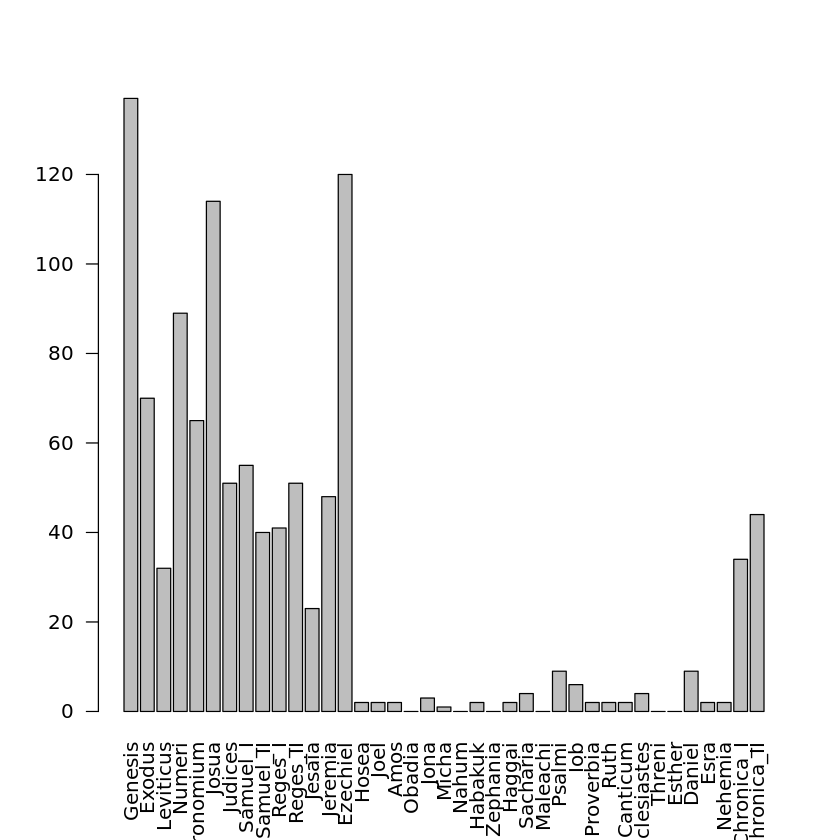

In [16]:
barplot(he.count, las = 2)

### 3.8 The Cleveland Dotplot

Sometimes a so called Cleveland dot plot is en elegant alternative of the barplot. You can make it by using the function dotchart().

In [ ]:
dotchart(he.count)

### 3.9 Again the Barplot

Now we know how many times local he occurs in each book. However, longer books tend to have more cases of local he than shorter books, so comparing them is relatively hard. Therefore, we divide the number of local he's by the total number of words per book. First we select the Hebrew words (in other words, we remove the Aramaic parts).

In [8]:
unique(dat$language)
dat.h <- dat[dat$language == 'hbo',]

[1] hbo arc
Levels: arc hbo

Then all Hebrew words are counted per book.

In [9]:
word.count <- table(dat.h$book)
word.count


      Genesis        Exodus     Leviticus        Numeri Deuteronomium 
        28756         23748         17099         23186         20127 
        Josua       Judices      Samuel_I     Samuel_II       Reges_I 
        14523         14085         18929         15612         18684 
     Reges_II        Jesaia       Jeremia      Ezechiel         Hosea 
        17307         22931         29717         26182          3146 
         Joel          Amos        Obadia          Jona         Micha 
         1318          2780           392           985          1895 
        Nahum       Habakuk      Zephania        Haggai      Sacharia 
          746           897          1037           877          4471 
     Maleachi        Psalmi           Iob     Proverbia          Ruth 
         1187         25369         10912          8859          1802 
     Canticum  Ecclesiastes        Threni        Esther        Daniel 
         1682          4233          1945          4621          3512 
     

Finally, we divide.

In [17]:
he.count/word.count


      Genesis        Exodus     Leviticus        Numeri Deuteronomium 
 0.0047642231  0.0029476166  0.0018714545  0.0038385232  0.0032294927 
        Josua       Judices      Samuel_I     Samuel_II       Reges_I 
 0.0078496178  0.0036208733  0.0029055946  0.0025621317  0.0021943909 
     Reges_II        Jesaia       Jeremia      Ezechiel         Hosea 
 0.0029467845  0.0010030090  0.0016152371  0.0045833015  0.0006357279 
         Joel          Amos        Obadia          Jona         Micha 
 0.0015174507  0.0007194245  0.0000000000  0.0030456853  0.0005277045 
        Nahum       Habakuk      Zephania        Haggai      Sacharia 
 0.0000000000  0.0022296544  0.0000000000  0.0022805017  0.0008946544 
     Maleachi        Psalmi           Iob     Proverbia          Ruth 
 0.0000000000  0.0003547637  0.0005498534  0.0002257591  0.0011098779 
     Canticum  Ecclesiastes        Threni        Esther        Daniel 
 0.0011890606  0.0009449563  0.0000000000  0.0000000000  0.0025626424 
     

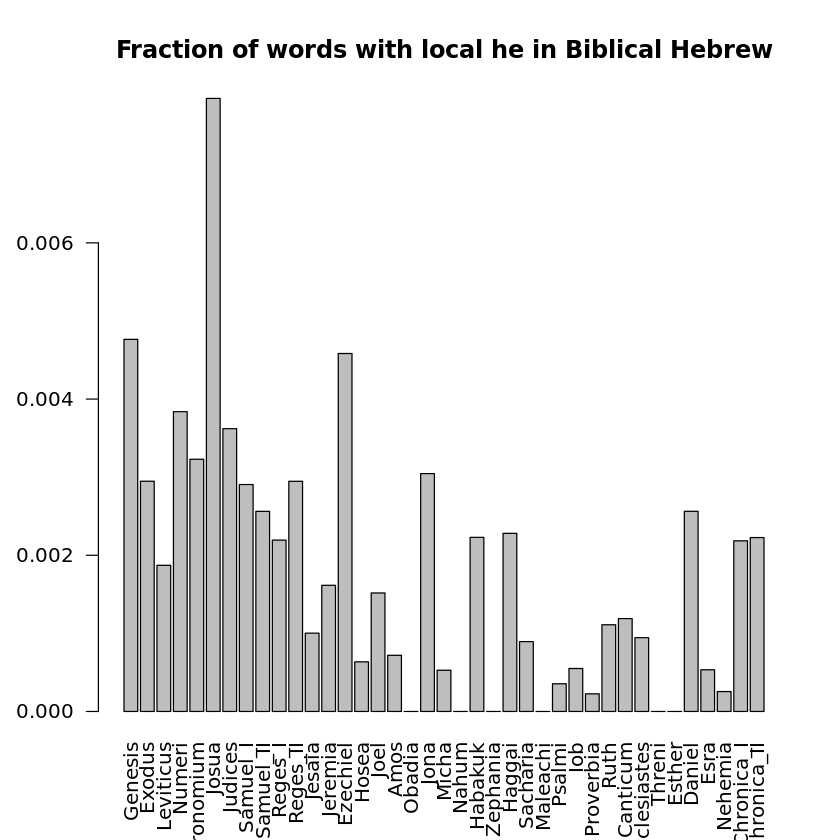

In [19]:
barplot(he.count/word.count, las = 2, main = 'Fraction of words with local he in Biblical Hebrew')

In various studies the length or complexity of linguistic units like phrases or clauses plays a role. First we count the number of clauses in each book.

In [28]:
colnames(dat.h) 
clause.count <- tapply(dat.h$clause_a, (dat.h$book), function(x) length(unique(x)))
#clause.count <- tapply(dat.h$clause_a, (dat.h$book.ord), max) does not work properly, because a number of clauses have been removed from Daniel and Esra

book,chapter,verse,lexeme.t,part.of.speech,language,state,tense,uvf,vbe,vbs,phrase.,clause.,enumeration,genre
Genesis,1,1,B,prep,hbo,NA,NA,absent,n/a,n/a,1,1,1,prose
Genesis,1,1,R>CJT/,subs,hbo,a,NA,absent,n/a,n/a,1,1,2,prose
Genesis,1,1,BR>[,verb,hbo,NA,perf,absent,,absent,2,1,3,prose
Genesis,1,1,>LHJM/,subs,hbo,a,NA,absent,n/a,n/a,3,1,4,prose
Genesis,1,1,>T,prep,hbo,NA,NA,absent,n/a,n/a,4,1,5,prose
Genesis,1,1,H,art,hbo,NA,NA,absent,n/a,n/a,4,1,6,prose


[1] "book"           "chapter"        "verse"          "lexeme.t"      
 [5] "part.of.speech" "language"       "state"          "tense"         
 [9] "uvf"            "vbe"            "vbs"            "phrase."       
[13] "clause."        "enumeration"    "genre"

Then a data frame is made and a column name is added.

In [22]:
clause.count <- as.data.frame(clause.count)

colnames(clause.count) <- c('clauses')
    
clause.count

,clauses
Genesis,7
Exodus,16
Leviticus,13
Numeri,10
Deuteronomium,17
Josua,11
Judices,11
Samuel_I,17
Samuel_II,31
Reges_I,14


The number of words in every book is counted and then the average number of words per clause in each book.

In [23]:
words.tab <- as.data.frame(table(dat.h$book))

colnames(words.tab) <- c('book', 'words')

In [25]:
words.per.clause <- words.tab$words/clause.count$clauses

rownames(words.per.clause)

[1] "Genesis"       "Exodus"        "Leviticus"     "Numeri"       
 [5] "Deuteronomium" "Josua"         "Judices"       "Samuel_I"     
 [9] "Samuel_II"     "Reges_I"       "Reges_II"      "Jesaia"       
[13] "Jeremia"       "Ezechiel"      "Hosea"         "Joel"         
[17] "Amos"          "Obadia"        "Jona"          "Micha"        
[21] "Nahum"         "Habakuk"       "Zephania"      "Haggai"       
[25] "Sacharia"      "Maleachi"      "Psalmi"        "Iob"          
[29] "Proverbia"     "Ruth"          "Canticum"      "Ecclesiastes" 
[33] "Threni"        "Esther"        "Daniel"        "Esra"         
[37] "Nehemia"       "Chronica_I"    "Chronica_II"

We add genre and manipulate the structure of the dataframe a bit.

In [26]:
words.per.clause <- as.data.frame(words.per.clause)

nrow(words.per.clause)

words.per.clause$book <- unique(dat$book)

words.per.clause$genre <- ifelse(rownames(words.per.clause) %in% prose, 'prose', 
             ifelse(rownames(words.per.clause) %in% poetry, 'poetry', 'prophecy'))

rownames(words.per.clause) <- NULL
words.per.clause

[1] 39

words.per.clause,book,genre
4108.0000,Genesis,prose
1484.2500,Exodus,prose
1315.3077,Leviticus,prose
2318.6000,Numeri,prose
1183.9412,Deuteronomium,prose
1320.2727,Josua,prose
1280.4545,Judices,prose
1113.4706,Samuel_I,prose
503.6129,Samuel_II,prose
1334.5714,Reges_I,prose


We can make a barplot of this result, and color the genres.

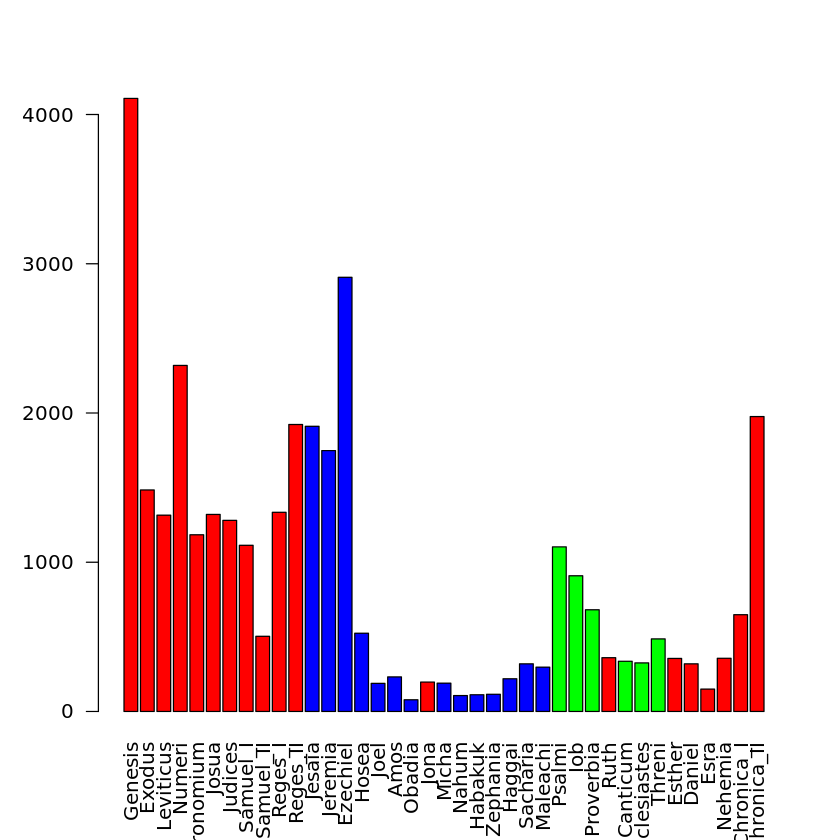

In [27]:
barplot(words.per.clause$words.per.clause, las = 2, col = c(rep('red', 11), rep('blue', 7), 'red', rep('blue', 7), rep('green', 3), 'red', rep('green', 3), rep('red', 11)))

### 3.10 The Boxplot

We have discoverd the mean of the number of words per clause per book. However, there is more to discover than just the mean. How want to know more about the variation within each book, for which a boxplot offers a good solution. For more information on box plots check the [Wikipedia page](https://en.wikipedia.org/wiki/Box_plot).

In [ ]:
install.packages('reshape')
library(reshape)

In [ ]:
dat.h.prose <- dat.h[dat.h$genre == 'prose', ]

genex.tab <- (table(factor(dat.h.prose$book), dat.h.prose$clause_a.))

genex.tab

With the function melt() we transform the data frame genex.tab. From a "wide" format we go to a "long" data format.

In [ ]:
genex.melt <- melt(genex.tab)

genex.ready <- subset(genex.melt, genex.melt[ , 3] != 0) 

genex.ready

Now the boxplot is created.

In [ ]:
boxplot(genex.ready[,3] ~ genex.ready[,1], las = 2, ylim = c(0, 20))

In [ ]:
poet <- dat.h[dat.h$genre == 'poetry',]
head(poet)
table(poet$book, poet$clause_a.)

### 3.11 Sampling and the Histogram

In various publications it is suggested that the article H occurs in lower frequencies in poetry than in prose. A natural way to investigate the variation within a dataset is by using a technique called sampling. Sampling from datasets plays an important role in various statistical techniques, like the bootstrap. 

The function sample() selects a number of elements from a vector randomly. This can be done with or without replacement:

In [ ]:
sample(1:6, 2, replace = T) #this is equal to rolling a die twice
sample(1:6, 2, replace = F) #this is not equal to rolling a die twice. Why not?

A histogram shows the distribution of a numeric variable. Suppose we roll a die 1000 times. With a histogram you can visualize the frequency of each number of eyes.

In [ ]:
die.rolls <- sample(1:6, 1000, replace = T)
hist(die.rolls, breaks=seq(0.5,6.5,1)) # the breaks argument makes the figure clearer.

In this experiment we take a random sample of 500 words from the books of Genesis and Psalms. In each sample we count how often the article H occurs in it and the result is stored in a vector. This is repeated 500 times. At the end we compare the books by making a histogram of the two vectors. 

In [ ]:
h.sampler <- function(book, nsamp) {
    # this function counts the number of 'H's in a random sample of size nsamp and returns it
    rand.vec <- sample(1:nrow(book), nsamp, replace = T)
    gen.sample <- book[rand.vec,]
    h.count <- nrow(gen.sample[gen.sample$lexeme.t == 'H',])    
    }


par(mfrow = c(1, 2)) # with par(mfrow = ) we specify the organization of the plots. c(1, 2) means: 1 row, 2 columns, 
                     # in other words, 2 plots next to each other

books <- c('Genesis', 'Psalmi') #the books are specified

for (bo in books) {
    book.subset <- dat[dat$book == bo,]
    h.count.vec <- numeric() # a numeric vector is initiated
    
    for (i in 1:500) {
        count <- h.sampler(book.subset, 500)
        h.count.vec[i] <- count # the count is added to the vector 
    }
hist(h.count.vec, col = 'lightblue')
abline(v = mean(h.count.vec)) # abline() with v draws vertical line. h = horizontal line
rug(h.count.vec) # sometimes this is an interesting addition to the plot. It adds the individual measurements to the x-axis.
}

par(mfrow = c(1, 1)) # we restore the original organization of the plots.

### 3.12 Hierarchical clustering

Hierarchical clustering is a multivariate technique, in which groups are made of similar objects. Similar objects are objects with more or less the same values for the features in the dataset. Characteristic of hierarchical clustering is that groups of nested clusters are formed in one supercluster. In a dataset one calculates the distances between the objects using the function dist()

First we remove proper nouns.

In [ ]:
dat.h.2 <- dat.h[dat.h$part.of.speech != 'nmpr',]
dat.h.2 <- droplevels(dat.h.2)
head(dat.h.2)

In [ ]:
lex <- table(dat.h.2$book, dat.h.2$lexeme.t)
lexem.binary <- apply(lex, 2, function(x) {ifelse(x > 0, 1, 0)})
select.lex <- lexem.binary[,colSums(lexem.binary) > 1 & colSums(lexem.binary) < 11]

In the next cell the distance object lex.dist is calculated. Check what it looks like. The function dist() has an argument 'method'. In this argument you specify the method with which the distance is measured. For binary data (1 (present) or 0 (absent)), you use the method 'binary', in general. Other methods are 'euclidian', 'manhattan', ''

In [ ]:
lex.dist <- dist(select.lex, method = 'binary')
plot(hclust(lex.dist))

There is a lot of interesting literature on clustering, for instance in corpus linguistics:  
Moisl, H., Cluster Analysis for Corpus Linguistics, Mouton De Gruyter, 2015.  

And a practical introduction on clustering with R:

Kassambara, A., Practical Guide to Cluster Analysis in R: Unsupervised Machine Learning, sthda.com, 2017.

### 3.13 The Heatmap

An alternative way to visualize these data is using a heatmap. A heatmap is a rectangular grid in which in each cell the value of 1 variable of 1 object is represented by a color. Some heatmap functions also perform a clustering, like the one that is used here.

In [ ]:
heatmap(select.lex, labCol = '')

#with labCol = '', the labels of the lexemes are removed. Because there are so many, they are unreadable.

### 3.14 Merging dataframes

It may occur that you use data from different sources, which you want to use together in your research. Then it useful to merge different dataframes.

First we make two dataframes consisting of a number of fictive books. dat.frame.A has information about the size of the books and dat.frame.B has information about the genre.

In [1]:
books.1 <- LETTERS[seq(from = 1, to = 10)]
num.of.words <- 1000 * 1:10

dat.frame.A <- as.data.frame(cbind(books.1, num.of.words))

books.2 <- LETTERS[seq(from = 6, to = 15)]
genre <- c(rep('prose', 5), rep('poetry', 5))

dat.frame.B <- as.data.frame(cbind(books.2, genre))

dat.frame.A

dat.frame.B

books.1,num.of.words
A,1000
B,2000
C,3000
D,4000
E,5000
F,6000
G,7000
H,8000
I,9000
J,10000


books.2,genre
F,prose
G,prose
H,prose
I,prose
J,prose
K,poetry
L,poetry
M,poetry
N,poetry
O,poetry


These dataframes can be merged in different ways, but we use the vaiable book as key for merging. Check carefully what the following four scripts do. If you download different csv files from SHEBANQ, you can use the feature "monad" as key for merging dataframes.

In [ ]:
merge(dat.frame.A, dat.frame.B, by.x = 'books.1', by.y = 'books.2') # this is an inner join

In [ ]:
merge(dat.frame.A, dat.frame.B, by.x = 'books.1', by.y = 'books.2', all = T) # this is an outer join

In [ ]:
merge(dat.frame.A, dat.frame.B, by.x = 'books.1', by.y = 'books.2', all.x = T) # this is a left join

In [ ]:
merge(dat.frame.A, dat.frame.B, by.x = 'books.1', by.y = 'books.2', all.y = T) # this is a right join

### 3.15 Finally...

Most of the code in this course is based on the base R package. However, many things can be done with other packages. There are many packages with specialized statistical tools, but also packages for general operations. The package dplyr is useful for data wrangling and ggplot2 can be used for making beautiful visualizations. 

Look here for cheatsheets:  
https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf  
https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf  

More interesting cheatsheets by R-studio can be found here:  
https://www.rstudio.com/resources/cheatsheets/

Of course there is much more to learn about R. As you might know already, doing things with R is more important than reading about R. There are many good practical online courses for free or a bit of money.  

You can find some here:  

https://www.coursera.org/courses?languages=en&query=data+sience+r  
https://www.edx.org/course?search_query=r  
https://www.udemy.com/courses/search/?q=r&src=ukw  



Are you looking for books on language analysis and R?  

Baayen, R.H., Analyzing Linguistic Data: A Practical Introduction to Statistics using R, Cambridge University Press, 2008.  
Gries, S.Th., Quantitative Corpus Linguistics with R: A Practical Introduction, Routledge, 2016, 2nd edition.  
Levshina, N., How to do Linguistics with R: Data exploration and statistical analysis, John Benjamins, 2015.  

Finally, if you want to receive a daily newsletter about R and statistical analyses and visualizations, subscribe on www.r-bloggers.com . This is both for beginners and more advanced users of R.